In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\iryna\Documents\01.07.2024 Instacart Basket Analysis'

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data', 'ords_prods_merge_grouped.pkl'))

### Creating Bar Chart

In [5]:
ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,_merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,frequency_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,both,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,both,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,both,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low spender,7.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,both,Regularly busy,Slowest days,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,both,Least busy,Slowest days,Average orders,3,New customer,4.972414,Low spender,9.0,Frequent customer


<Axes: xlabel='order_dow'>

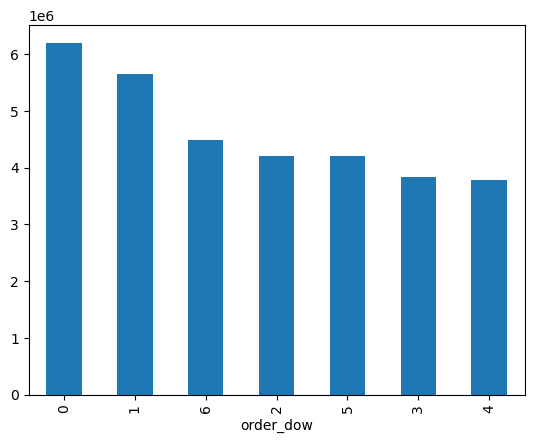

In [6]:
ords_prods_merge['order_dow'].value_counts().plot.bar()

<Axes: xlabel='order_dow'>

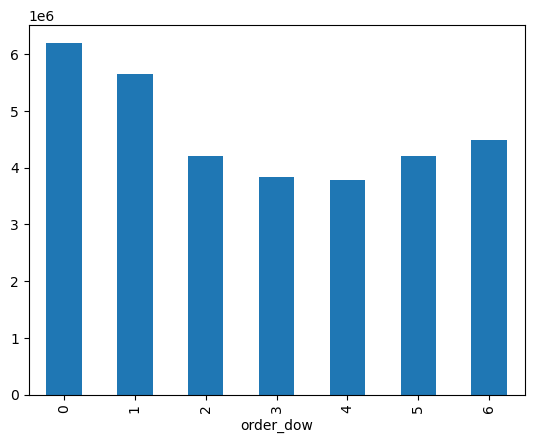

In [7]:
ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar()

### Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

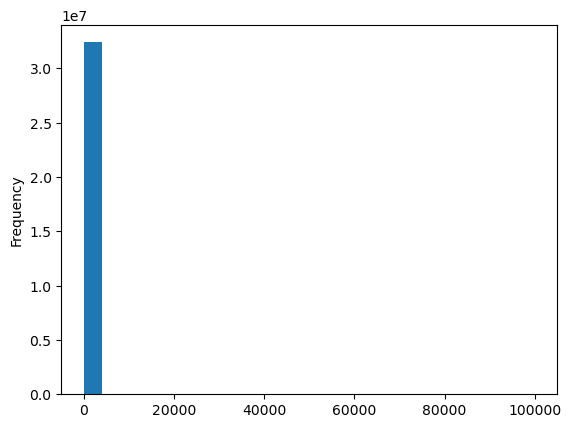

In [9]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [10]:
# Something doesn’t seem right here. Should have gotten 25 bars (one for each bin). 
# An extreme value of 99,999 is forcing histogram to shove all the small values into one bar and the extreme value in another one. And this second bar is so tiny that can’t even see it on the chart. 

In [11]:
# The describe() function against “prices” column

ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

##### Noticed something odd in the maximum value

In [13]:
ords_prods_merge['prices'].mean()

11.980225638383468

In [14]:
ords_prods_merge['prices'].median()

7.4

In [15]:
ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

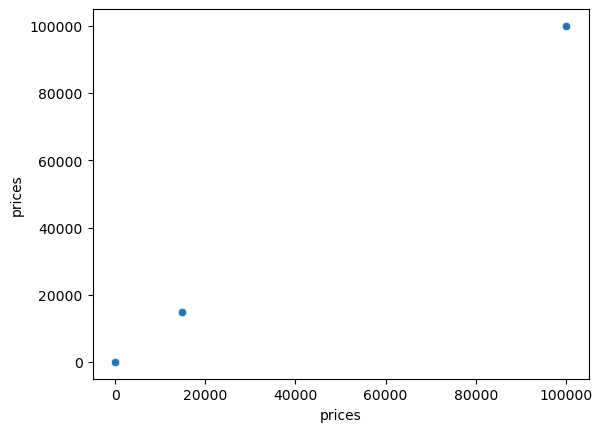

In [16]:
# Scatterplot

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

##### Far beyond values you’d ever expect—values close to 20,000 and even 100,000

In [34]:
# If imagine the maximum price anyone would pay in a supermarket were around $100

In [17]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,_merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,both,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,both,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,both,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,both,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,both,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,20.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,both,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,both,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,both,Regularly busy,Slowest days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,both,Regularly busy,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,7.0,Frequent customer


##### Can assume that it’s the $14,900.00 and  $99,999.00 values that are skewing charts

In [40]:
# Marking values as missing (into NaNs) since they don’t make sense in terms of the other values in the column.

In [42]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [44]:
ords_prods_merge['prices'].max()

25.0

<Axes: ylabel='Frequency'>

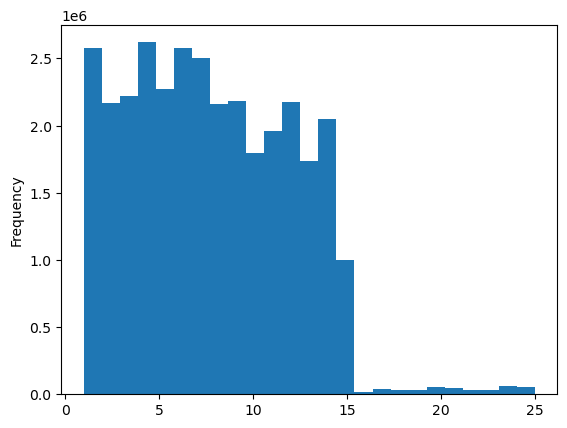

In [46]:
ords_prods_merge['prices'].plot.hist(bins = 25)

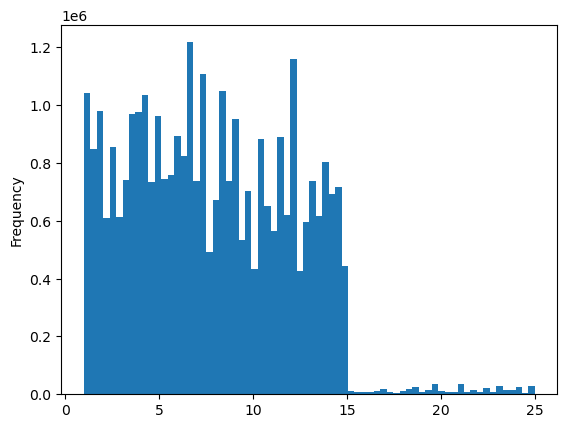

In [48]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [52]:
# Exporting histogram 

hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_frequency.png'))

### Creating Line Charts

In [55]:
# Sampling Data

In [57]:
# Creating list holding True/False values

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [71]:
# Store 70% of the samle in the dataframe Big

big = ords_prods_merge[dev]

In [73]:
# Store 30% of the samle in the dataframe Small

small = ords_prods_merge[~dev]

In [67]:
len(ords_prods_merge)

32404859

In [75]:
len(big)+len(small)

32404859

In [79]:
# Reducing samle (only necessary columns)

df_2 = small[['order_dow','prices']]

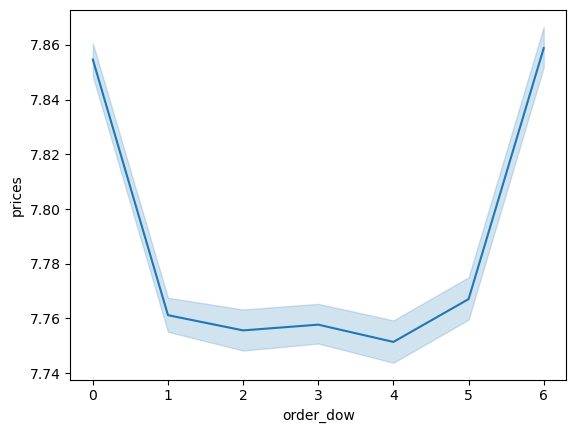

In [84]:
# Creating line chart

line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')